# PLCO Cancer Screening via PCA

## Project Description

The Prostate, Lung, Colorectal, and Ovarian (PLCO) Cancer Screening Trial is a large randomized trial designed and sponsored by the National Cancer Institute (NCI) to determine the chance of getting PLCO cancer. The screening component of the trial was completed in 2006. Participants are being followed and additional data will be collected through 2015. In this assignment, you work on a subset of the dataset, for 216 patients, labeled as ('C') cancer and ('N') No cancer, with 4000 features (info related to gene, blood, etc.)

- Part A

Do a PCA and find the first two Principal Components (PC1 and PC2). Plot PC1-PC2 for these 216 patients.

- Part B

Check how much information will preserve if we only use the first 10 principal components (in other words, calculate the percentage of information we describe if instead of using all 4000 variables, we use the first 10 PCs).

* Keep in mind, the EigenValues are not in order of Large to Small, so you must sort them, and their corresponding EigenVectors. See the Example, under Lecture PCA, and the way I sort them. 

- Part C

Build an ANN classifier for this dataset with these new 10 variables (the first 10 PCs), and evaluate your model accuracy.

## Importing the Libraries

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time

## Data processing

### Importing the Dataset

In [176]:
dataset = pd.read_csv('Cancer.csv',header=None)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [177]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,4000
0,0.063915,0.033242,0.018484,0.008618,0.035629,0.037925,0.028865,0.061731,0.063100,0.024787,...,0.021515,0.017385,0.018564,0.010027,0.012907,0.023405,0.038839,0.038151,0.032085,C
1,0.025409,0.051085,0.056305,0.021738,0.027410,0.014914,0.022455,0.023957,0.060527,0.047382,...,0.055033,0.080864,0.053423,0.051942,0.013187,0.028573,0.020427,0.023261,0.019975,C
2,0.025536,0.036123,0.054195,0.009735,0.027521,0.052255,0.042812,0.069087,0.069873,0.066629,...,0.033783,0.029022,0.046397,0.033288,0.041889,0.019256,-0.009447,0.021481,0.025569,C
3,0.012817,0.029652,0.079290,0.050677,0.039737,0.057713,0.044492,0.034581,0.042587,0.034147,...,0.036083,0.038598,0.048881,0.025569,0.026710,0.025122,0.047466,0.046706,0.043482,C
4,0.019846,-0.010577,-0.007504,0.019042,0.068786,0.061764,0.039036,0.020445,0.025988,0.066716,...,0.032044,0.026320,0.072016,0.070145,0.055744,0.051084,0.036683,0.043729,0.040289,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.019997,0.002927,0.006809,-0.003585,0.026362,0.026540,0.026112,0.026230,0.021676,0.024205,...,0.018509,0.013225,0.015765,0.018762,0.012212,0.009340,0.020955,0.010685,0.013423,N
212,0.042346,0.031884,0.049617,0.031419,0.042043,0.033383,0.054695,0.079029,0.063147,0.040817,...,0.019066,0.038845,0.035201,0.013012,0.032180,0.026465,0.017850,0.036014,0.018276,N
213,0.023558,0.021331,0.016210,0.012324,0.022074,0.029829,0.032624,0.022100,0.028950,0.037769,...,0.031909,0.019024,0.024298,0.032061,0.009901,0.011709,0.008274,0.004742,0.024756,N
214,0.028351,0.023266,0.004556,0.024095,0.018943,0.025935,0.019066,0.037213,0.041892,0.031092,...,0.012613,0.031370,0.030285,0.034522,0.024089,0.006737,0.010033,0.017391,0.031537,N


### Encoding the output data

In [178]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Part A: PCA with SKLearn

In [179]:
from sklearn.decomposition import PCA
PrinCom=PCA(n_components=2) # 2 PCs
PrinCom.fit(X)
Z=PrinCom.transform(X)

In [180]:
pd.DataFrame(data = Z, columns = ['PC1', 'PC2'])

,PC1,PC2
0,7.967050,-1.272538
1,9.232076,0.301563
2,19.916177,-0.481135
3,12.532131,-0.771284
4,29.609009,9.245273
...,...,...
211,-9.371847,-4.630907
212,-2.911468,-1.058665
213,-0.593858,-5.645191
214,-3.906437,-6.615193


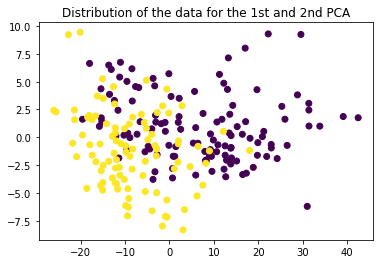

In [181]:
plt.scatter(Z[:,0],Z[:,1],c=y) 
plt.title("Distribution of the data for the 1st and 2nd PCA")
plt.show()

This answers Part A: find the first two principal components PC1 and PC2.

# Part B: How much information will preserve using 10 Principal components?

## Calculate the contribution of each variable

Perform PCA with SKLearn using 10 PCs

In [182]:
from sklearn.decomposition import PCA
PrinCom=PCA(n_components=10) # 10 PCs
PrinCom.fit(X)
Z=PrinCom.transform(X)

Calculate the percentage of information we describe if instead of using all 4000 variables, we use the first 10 PCs)

In [183]:
(e[0]+e[1]+e[2]+e[3]+e[4]+e[5]+e[6]+e[7]+e[8]+e[9])/np.sum(e) 

1.0

This answers Part B of the question, telling that 100%  of information will be preserved if we only use the first 10 principal components.

## Plot the contribution of each PCs

In [184]:
e = []
for z in Z.T:
  e.append(np.var(z))

In [185]:
contributions = []
for i in range(Z.shape[1]):
  contributions.append(np.sum(e[:i+1]) / np.sum(e))

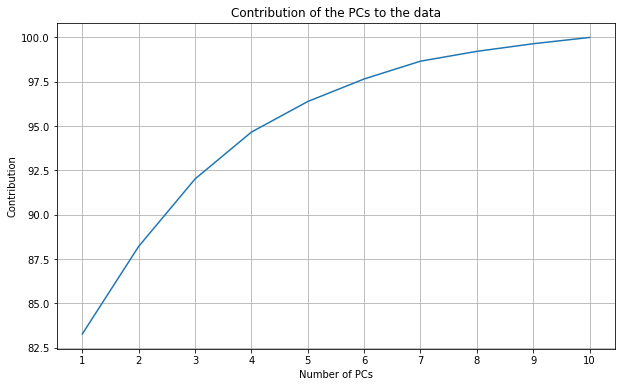

In [186]:
plt.figure(figsize=(10,6))
plt.plot(list(range(1, 11)), [i*100 for i in contributions])
plt.title("Contribution of the PCs to the data")
plt.xlabel("Number of PCs")
plt.ylabel("Contribution")
plt.grid()
plt.xticks(list(range(1,11)))
plt.show()

# Part C: ANN Model

The first 10 PCs are taken as input to the model

In [187]:
inputs= Z[:, 0:10]

Splitting the data to the trainingset and testset

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, y, test_size = 0.2, random_state = 0)

Feature scaling

In [189]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [190]:
CancerModel=tf.keras.models.Sequential()
CancerModel.add(tf.keras.layers.Dense(10,activation='relu')) # Build the input layer
CancerModel.add(tf.keras.layers.Dense(20,activation='relu')) # Build the first hidden layer
CancerModel.add(tf.keras.layers.Dense(2,activation='sigmoid')) # Build the output layer
CancerModel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
CancerModel.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7860 - accuracy: 0.4884
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7475 - accuracy: 0.5058
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.5465
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5581
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.5698
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.5988
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.6279
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.6744
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.7267
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.7384
Epoch 11/100
6/6 [===========

Evaluating the model over the test set

In [191]:
CancerModel.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 1.0000


[0.02044021338224411, 1.0]

## Predicting on the Test Set

In [192]:
y_pred = CancerModel.predict(X_test)
y_pred=np.argmax(y_pred, axis=1) # Solve error message: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets
y_pred  = (y_pred > 0.5)
print(y_pred)

2/2 [==============================] - 0s 2ms/step
[ True False False  True  True False False  True False False False  True
  True False False  True  True False  True False  True  True  True  True
  True False  True False False False False False  True False  True  True
 False  True False  True False  True  True False]


## Confusion Matrix & accuracy

### Calculate confusion matrix

In [193]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = (y_pred > 0.5) #Classification metrics can't handle a mix of binary and continuous targets, so we change the target (y_pred) to binary, True/False
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[22  0]
 [ 0 22]]


1.0

#### Plot confusion matrix

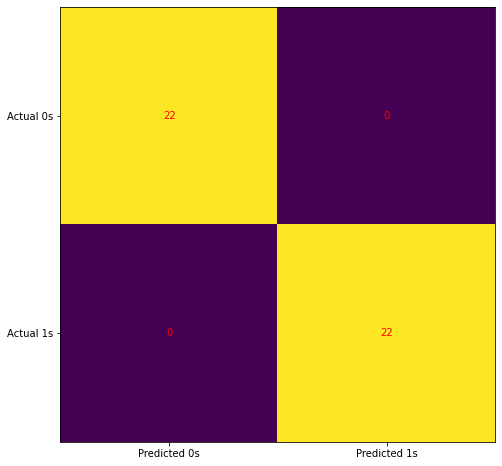

In [194]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Try some different classifiers

In [196]:
from sklearn.metrics import accuracy_score

## KNN 

In [197]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) # change n_neighbors; boundary becomes smoother with increasing value of K
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
# accuracy = np.sum(y_pred==y_test)/len(y_test)
# print(accuracy)

0.9545454545454546


## SVM

In [198]:
from sklearn.svm import SVC
svmrbf = SVC(kernel='rbf')
svmrbf.fit(X_train, y_train)
y_pred = svmrbf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9772727272727273


# Discussion

In Part A, we performed a Principal Component Analysis to find the first two PCs using SKLearn, and the PC1-PC2 for 216 patients are plotted. </br></br> In Part B, we calculated the first 10 PCs and found their contributin over using all 4000 variables. We found that 100% of information will be preserved if we only use the first 10 principal components.The plot of contribution of PCs vs.Numbvers of PCs is also plotted. </br></br> In Part C, we built an ANN classifier for this dataset with the first 10 PCs. Using evaluate() function, we use the test data to evaluate the already trained model and found that the loss value of the model is 0.02044021338224411, and the metrics value is 1.0.In addition, we have calculated the confusion matrix, and found its accuracy is 1.0, meaning that the ANN model is robust.</br></br>KNN and SVM machine learning models are also built to compare with our ANN model. The accuracy of the trianed KNN model is 0.9545454545454546, and the accuracy of the SVM model is 0.9772727272727273. SVM has the same accuracy as the ANN model, while KNN model shows a slightly lower accuracy.